1D FFT - numerical experiment on Nyquist/Kotelnikov Theorem and length of observation window. Interesting video that visualizes this experiment https://www.youtube.com/watch?v=MBnnXbOM5S4

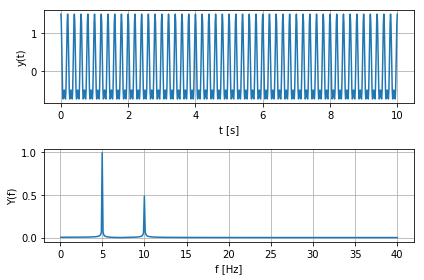

The number of points that are used in FFT are 801


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

# pulse duration - length of observation window
T = 10
# time interval - sampling period
dt = 1/80

# discrete times
x = np.linspace(0.0,T,int(T/dt)+1)
# total number of information instants
N = x.shape[0]

y = np.cos(5.0 * 2.0*np.pi*x) + 0.5*np.cos(10.0 * 2.0*np.pi*x)
yf = fft(y)

# sampling frequency
Fs = 1/dt
# frequency intervals 
df = Fs/N
# discrte frequencies
xf = np.linspace(0.0,Fs,N)

plt.subplot(2,1,1)
plt.plot(x,y)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('y(t)')

plt.subplot(2,1,2)
# keep half of the spectrum and normalize
plt.plot(xf[1:N//2+1], 2.0/N * np.abs(yf[1:N//2+1]))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Y(f)')

plt.tight_layout()
plt.show()
print("The number of points that are used in FFT are",N)

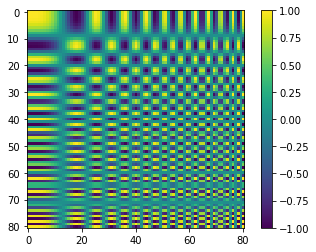

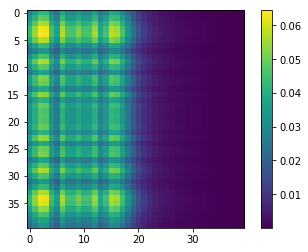

5.5133310463009332e-16

In [11]:
# 2D FFT

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# image size - length of observation window
L_x = 1
L_y = 1

# space interval - sampling period
dx = 1/80
dy = 1/80

# discrete space
x = np.linspace(0.0,L_x,int(L_x/dx)+1)
y = np.linspace(0.0,L_y,int(L_y/dy)+1)
xv,yv = np.meshgrid(x,y)

# total number of information instants
N_x = x.shape[0]
N_y = y.shape[0]

# change these to see the spectrum-spread at low frequencies
p_x = 2
p_y = 2
Y = np.cos(10.0 * 2.0*np.pi*xv**p_x)*np.cos(20.0 * 2.0*np.pi*yv**p_y) 
Yf = fft2(Y)

# this is how to manually compute 2D fft or dst as described in problem set 3 as well:
# Apply fft to each row in the array and then apply dst to each column of the resulting array
Yf_fft = fft(fft(Y,axis=1), axis=0)

# sampling spatial frequency
Fs_x = 1/dx
Fs_y = 1/dy

# frequency intervals 
df_x = Fs_x/N_x
df_y = Fs_y/N_y

# discrte frequencies
xf = np.linspace(0.0,Fs_x,N_x)
yf = np.linspace(0.0,Fs_y,N_y)
xfv,yfv = np.meshgrid(xf,yf)

# uncomment these for surface plots
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(xv,yv,Y,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# ax.set_xlabel('x [m]')
# ax.set_ylabel('y [m]')
# ax.set_zlabel('z(x,y)')

plt.imshow(Y)
plt.colorbar()
plt.show()

# uncomment these for surface plots
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(xfv[1:N_y//2+1,1:N_x//2+1],yfv[1:N_y//2+1,1:N_x//2+1],4.0/N_x/N_y * np.abs(Yf[1:N_y//2+1,1:N_x//2+1]),cmap=cm.coolwarm,linewidth=0, antialiased=False)
# ax.set_xlabel('kx [1/m]')
# ax.set_ylabel('ky [1/m]')
# ax.set_zlabel('Z(kx,ky)')
# plt.show()

# keep half of the spectrum and normalize
plt.imshow(4.0/N_x/N_y * np.abs(Yf[1:N_y//2+1,1:N_x//2+1]))
plt.colorbar()
plt.show()

# sanity check that 2D fft works properly
np.linalg.norm(Yf[:]-Yf_fft[:])/np.linalg.norm(Yf[:])

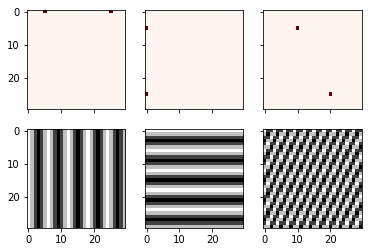

In [12]:
# from http://scipy.github.io/devdocs/tutorial/fftpack.html#discrete-sine-transforms

# The example below demonstrates a 2-dimensional IFFT and plots the resulting (2-dimensional) time-domain signals.
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()

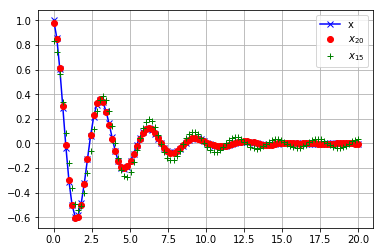

In [13]:
# from http://scipy.github.io/devdocs/tutorial/fftpack.html#discrete-sine-transforms

# The DCT exhibits the “energy compaction property”, meaning that for many signals only the first few DCT coefficients have 
# significant magnitude. Zeroing out the other coefficients leads to a small reconstruction error, a fact which is exploited 
# in lossy signal compression (e.g. JPEG compression).

# The example below shows a signal x and two reconstructions (x_20 and x_15) from the signal’s DCT coefficients. The signal x_20
# is reconstructed from the first 20 DCT coefficients, x_15 is reconstructed from the first 15 DCT coefficients. It can be seen 
# that the relative error of using 20 coefficients is still very small (~0.1%), but provides a five-fold compression rate.

from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)


# keep the 20 first coefficients
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)


# keep the 15 first coefficients
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()

In [14]:
sum(abs(x-yr)**2) / sum(abs(x)**2)

0.071881806500767975

#### Types of DST and normalization http://scipy.github.io/devdocs/tutorial/fftpack.html#type-i-dst


In [11]:
from scipy.fftpack import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
x.shape[0]

5

In [12]:
# scaling factor 2*N = 10
idst(dst(x, type=2), type=2)

array([ 10.,  20.,  10., -10.,  15.])

In [13]:
# no scaling factor
idst(dst(x, type=2, norm='ortho'), type=2, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [14]:
# scaling factor 2*N = 10
idst(dst(x, type=3), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [15]:
# no scaling factor
idst(dst(x, type=3, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [16]:
# scaling factor 2*(N+1) = 12
idst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])